In [5]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [6]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


In [7]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()


np.uint8(9)

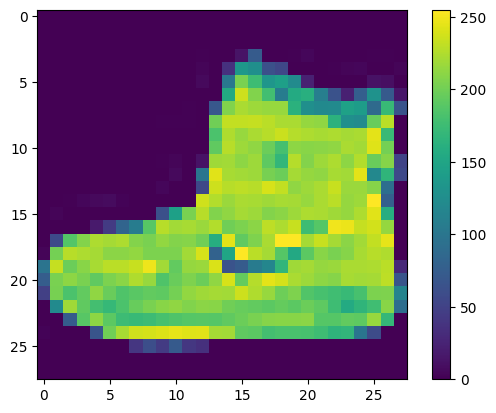

In [8]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()


In [9]:
imagens_treino = imagens_treino/float(255)

In [10]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7629 - loss: 0.6736 - val_accuracy: 0.8508 - val_loss: 0.4157
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8538 - loss: 0.4035 - val_accuracy: 0.8580 - val_loss: 0.3902
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8662 - loss: 0.3664 - val_accuracy: 0.8716 - val_loss: 0.3577
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8729 - loss: 0.3464 - val_accuracy: 0.8744 - val_loss: 0.3448
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8838 - loss: 0.3186 - val_accuracy: 0.8839 - val_loss: 0.3262


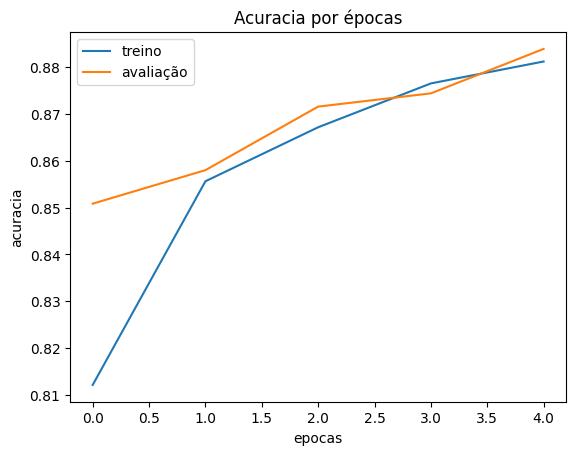

In [11]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acuracia por épocas")
plt.xlabel("epocas")
plt.ylabel("acuracia")
plt.legend(['treino', 'avaliação'])

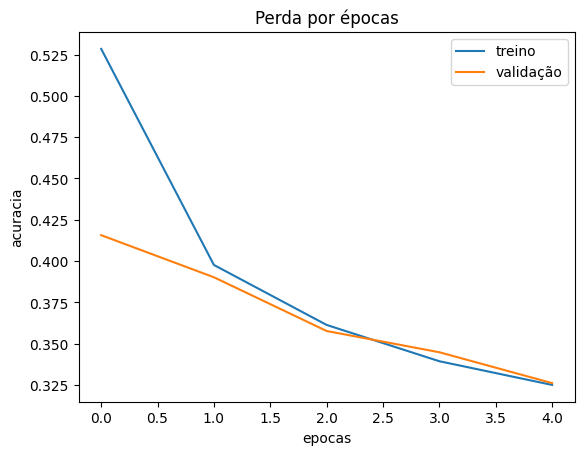

In [12]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perda por épocas")
plt.xlabel("epocas")
plt.ylabel("acuracia")
plt.legend(['treino', 'validação'])

In [13]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes_modelo_salvo[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
resultado teste: 2


In [1]:
from tensorflow.keras.models import load_model
!pip install --upgrade tensorflow keras


In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax

custom_objects = {'softmax_v2': softmax}
modelo_salvo = load_model('modelo.h5', custom_objects=custom_objects)

In [10]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8351 - loss: 66.8314


[72.2364730834961, 0.8313999772071838]